In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
import arviz as az
import matplotlib.pyplot as plt
import math

C:\Users\can2hr\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\can2hr\Anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
classify = pd.read_csv('https://media.githubusercontent.com/media/cnickol26/BigDataBowl2023/main/data_flipped.csv')

<ipython-input-2-5a06576d793d>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  classify = pd.read_csv('https://media.githubusercontent.com/media/cnickol26/BigDataBowl2023/main/data_flipped.csv')


In [3]:
## EDA looking at how to classify rush types
play1 = classify[classify['uniqueplayId'] == 2021091902389]
play1 = play1[play1['pff_positionLinedUp'].isin(['LT', 'RE'])]
play_data = play1[['team','new_x','new_y','o','frameId']]

In [4]:
test = play_data[play_data['frameId'] == 1]
test

,team,new_x,new_y,o,frameId
35057,CLE,0.75,3.55,78.29,1
304811,HOU,1.29,3.55,266.11,1


In [5]:
p1 = [test['new_x'].iloc[0],test['new_y'].iloc[0]]
p2 = [test['new_x'].iloc[1],test['new_y'].iloc[1]]

In [6]:
print (math.dist(p1, p2))

0.5399999999999991


In [7]:
output = play_data.groupby(['frameId']).apply(lambda x: math.dist([x['new_x'].iloc[0],x['new_y'].iloc[0]],[x['new_x'].iloc[1],x['new_y'].iloc[1]])).to_frame().reset_index().rename(columns = {0 :'tackle_end_dis'})
output

,frameId,tackle_end_dis
0,1,0.540000
1,2,0.540000
2,3,0.540093
3,4,0.540093
4,5,0.550364
5,6,0.570088
6,7,0.590000
7,8,0.640000
8,9,0.750067
9,10,0.900056


In [8]:
play_data.merge(output, on = 'frameId', how = 'left')

,team,new_x,new_y,o,frameId,tackle_end_dis
0,CLE,0.75,3.55,78.29,1,0.540000
1,CLE,0.75,3.55,76.77,2,0.540000
2,CLE,0.75,3.56,75.32,3,0.540093
3,CLE,0.75,3.56,75.32,4,0.540093
4,CLE,0.74,3.57,75.32,5,0.550364
5,CLE,0.72,3.57,72.96,6,0.570088
6,CLE,0.71,3.57,71.97,7,0.590000
7,CLE,0.67,3.58,74.92,8,0.640000
8,CLE,0.59,3.59,76.01,9,0.750067
9,CLE,0.48,3.61,73.45,10,0.900056


In [9]:
## creating a function to check if the players are looking at each other
def check_angle(x,y):
    if y > 180:
        y = y - 180
    else:
        y = 360 - (180 - y)
    if y < 15:
        top = y + 15
        bottom = 360 - (15 - y)
        if ((x <= top & x >=0) | (x >= bottom)):
            return 1
        else:
            return 0
    elif y > 345:
        top = 360 - y
        bottom = y - 15
        if ((x >= bottom) | (x <= top)):
            return 1
        else:
            return 0
    else:
        top = y + 15
        bottom = y - 15
        if ((x <= top) & (x >= bottom)):
            return 1
        else:
            return 0
        

In [10]:
check_angle(78, 266)

1

In [11]:
play_data.groupby(['frameId']).apply(lambda x: check_angle(x['o'].iloc[0].astype(int),x['o'].iloc[1].astype(int))).to_frame().reset_index().rename(columns = {0 :'facing_each_other'})

,frameId,facing_each_other
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,0


In [12]:
## EDA looking at speed
play2 = classify[classify['uniqueplayId'] == 20210919023392]
play2 = play2[play2['pff_positionLinedUp'].isin(['LT', 'REO'])]
play_data2 = play2[['team','new_x','new_y','o','frameId']]
play_data2

,team,new_x,new_y,o,frameId
35741,CLE,0.13,6.35,249.78,3
35742,CLE,0.09,6.34,244.89,4
35743,CLE,0.07,6.34,241.87,5
35744,CLE,0.01,6.34,234.69,6
35745,CLE,0.11,6.33,230.35,7
35746,CLE,0.28,6.32,244.42,8
35747,CLE,0.51,6.32,241.57,9
35748,CLE,0.78,6.29,238.02,10
35749,CLE,1.12,6.26,228.60,11
35750,CLE,1.51,6.21,237.27,12


In [13]:
output2 = play_data2.groupby(['frameId']).apply(lambda x: math.dist([x['new_x'].iloc[0],x['new_y'].iloc[0]],[x['new_x'].iloc[1],x['new_y'].iloc[1]])).to_frame().reset_index().rename(columns = {0 :'tackle_end_dis'})
output2

,frameId,tackle_end_dis
0,3,3.330616
1,4,3.344398
2,5,3.360193
3,6,3.394775
4,7,3.353357
5,8,3.272996
6,9,3.186989
7,10,3.054128
8,11,2.918150
9,12,2.712656


In [14]:
play_data2.merge(output, on = 'frameId', how = 'left')

,team,new_x,new_y,o,frameId,tackle_end_dis
0,CLE,0.13,6.35,249.78,3,0.540093
1,CLE,0.09,6.34,244.89,4,0.540093
2,CLE,0.07,6.34,241.87,5,0.550364
3,CLE,0.01,6.34,234.69,6,0.570088
4,CLE,0.11,6.33,230.35,7,0.590000
5,CLE,0.28,6.32,244.42,8,0.640000
6,CLE,0.51,6.32,241.57,9,0.750067
7,CLE,0.78,6.29,238.02,10,0.900056
8,CLE,1.12,6.26,228.60,11,1.140000
9,CLE,1.51,6.21,237.27,12,1.470000


In [15]:
play_data2.groupby(['frameId']).apply(lambda x: check_angle(x['o'].iloc[0].astype(int),x['o'].iloc[1].astype(int))).to_frame().reset_index().rename(columns = {0 :'facing_each_other'})

,frameId,facing_each_other
0,3,1
1,4,1
2,5,1
3,6,1
4,7,1
5,8,1
6,9,1
7,10,1
8,11,1
9,12,1


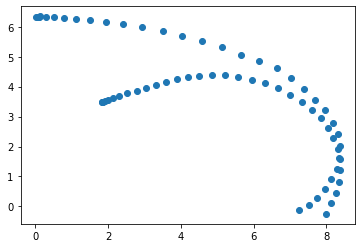

In [16]:
## Speed rush play from animations
plt.scatter(play_data2['new_x'],play_data2['new_y'])

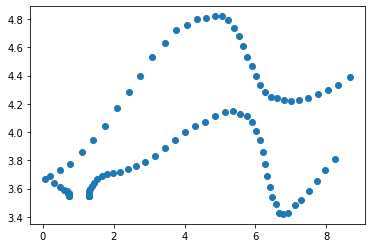

In [18]:
## Power/bull rush play from animations
plt.scatter(play_data['new_x'],play_data['new_y'])

In [51]:
play3 = classify[classify['uniqueplayId'] == 20210909003862]
play3 = play3[play3['pff_positionLinedUp'].isin(['LT', 'ROLB'])]
play_data3 = play3[['team','new_x','new_y','o','frameId','pff_positionLinedUp']]
play_data3

,team,new_x,new_y,o,frameId,pff_positionLinedUp
1986,DAL,0.76,6.25,246.52,1,ROLB
1987,DAL,0.76,6.24,248.25,2,ROLB
1988,DAL,0.75,6.24,248.25,3,ROLB
1989,DAL,0.75,6.23,250.22,4,ROLB
1990,DAL,0.73,6.23,251.47,5,ROLB
1991,DAL,0.71,6.22,252.54,6,ROLB
1992,DAL,0.63,6.18,249.91,7,ROLB
1993,DAL,0.50,6.11,261.85,8,ROLB
1994,DAL,0.32,6.01,266.66,9,ROLB
1995,DAL,0.08,5.89,281.35,10,ROLB


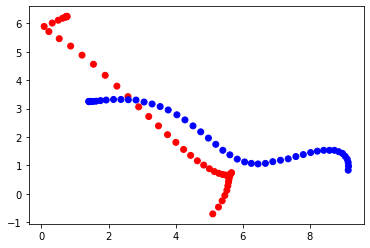

In [52]:
colors = {'LT':'Blue','ROLB':'Red'}
plt.scatter(play_data3['new_x'],play_data3['new_y'], c = play_data3['pff_positionLinedUp'].map(colors))

In [48]:
classify['uniqueplayId'][2000]

20210909003862